<div class="alert alert-info" role="alert">
 <p class ="lead"> 
 <h1>Física Computacional </h1>
 <h2>Proyecto Final</h2>
 </div>

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/1/1f/Julia_Programming_Language_Logo.svg/1200px-Julia_Programming_Language_Logo.svg.png" style="height:42px;display:inline">

> Autores: Aquino Chapa Martha Abril, Castro Granados Celeste y Rizo Franco Samantha

In [13]:
using Plots

# Planteamiento del Problema:

Supongamos una astronauta orbitando alrededor de la Tierra y de repente lanza con una fuerza $\vec{F}$ una herramienta hacia el espacio exterior. ¿Se volverán a encontrar en algún momento la astronauta y su herramienta?

# Desarrollo del problema.

Consideraremos un sistema conformado exclusivamente conformado por la Tierra, la astornauta y la herramienta.

Recordemos que la fuerza gravitacional que siente una masa $m_1$ debido a una masa $m_2$ , separadas por una distancia $r$, es:

$$ \vec{F_{12}} = - G \frac{m_1 m_2}{(r_{12})^2} \hat{r_{12}}$$

Con $G$ la constante de gravitación de Newton ($G = 6.67 \times 10^{−11} N m^2/kg^2$) y $\hat{r_{12}}$ el vector unitario con
origen en la partícula 1 y que apunta a la partícula 2.

> *Como nota interesante: los satélites se mantienen en su órbita gracias a un determinado equilibrio de fuerzas. La fuerza de la gravedad, que lo mantiene unido a la Tierra o el objeto sobre el que se mueven, y la inercia del peso, que es la fuerza que tiene el propio satélite que lo empuja fuera de la órbita. Si este equilibrio se rompe, el satélite puede salirse de su órbita.*

Tomaremos a la Tierra como el centro de referencia de nuestro sistema y realizaremos un análisis físico tomando encuenta solamente las interacciones debidas a la fuerza gravitacional. Además, la fuerza gravitacional Tierra-astronauta y Tierra-herramienta es prácticamente nula, por lo cual la Tierra puede ser considerada el origen de un sistema de referencia fijo.
Por lo tanto, podemos enfocarnos en análizar solamente el movimiento de la astronauta y de la herramienta a partir de la fuerza gravitacional que siente cada uno de ellos debido a la interacción con los demás cuerpos del sistema. 

Dicho lo anterior, describimos las ecuaciones de movimiento en el esquema newtoniano: 

1. **Ecuaciones del astronauta:**

Sea $\vec f = m_A \vec{a_A}$ la fuerza con que la astronauta lanza la herramienta, por lo cual, la fuerza sobre la astronauta se describe como

$$ \Rightarrow m_A\ddot{\vec{r}}_A=-\frac{GM_Tm_A}{r_A^2}\hat{r_A}+\frac{Gm_Am_H}{|\vec{r}_A-\vec{r}_H|^2}(\vec{r}_H-\vec{r}_A)-m_A\vec{a}_A$$

Realizamos el siguiente cambio de variable $\tau=\sqrt{GM_T}$ (las unidades de tiempo están en términos de $\tau$) y tenemos que:

$$\frac{d}{d\tau}=\frac{dt}{d\tau}\frac{d}{dt}=\frac{1}{\sqrt{GM_T}}\frac{d}{dt}\quad\quad \Rightarrow \quad\quad \frac{d^2}{d\tau}=\frac{1}{GM_T}\frac{d^2}{dt^2}$$

De esta manera:

$$\frac{1}{GM_T}\frac{d^2\vec{r}_A}{dt^2}=\frac{d^2\vec{r}_A}{d\tau^2}=-\frac{\vec{r}_A}{r_A^3}+\frac{m_H}{M_T}\frac{(\vec{r}_H-\vec{r}_A)}{|\vec{r}_H-\vec{r}_A|^3}-\frac{\vec{a}_A}{GM_T}$$

Ahora, sea $\vec{r}_{HA}=(\vec{r}_H-\vec{r}_A)\Rightarrow$ $r_{HA}$ es la norma de $\vec{r}_{HA}$. 

$$\Rightarrow \frac{d^2\vec{r}_A}{d\tau^2}=-\frac{\vec{r}_A}{r_A^3}+\frac{m_H}{M_T}\frac{\vec{r}_{HA}}{r_{HA}^3}-\frac{\vec{a}_A}{GM_T}$$

Consideramos que el movimiento se realiza en el plano $xy$, por lo tanto:

$$\frac{d^2 x_A}{d\tau^2}=-\frac{x_A}{r_A^3}+\frac{m_H}{M_T}\frac{(x_H-x_A)}{r_{HA}^3}-\frac{a_{AX}}{GM_T}$$
$$\frac{d^2 y_A}{d\tau^2}=-\frac{y_A}{r_A^3}+\frac{m_H}{M_T}\frac{(y_H-y_A)}{r_{HA}^3}-\frac{a_{AY}}{GM_T}$$

2. **Ecuaciones de la herramienta:**

Recordamos primero que la fuerza con la que el astronauta lanza la herramienta es $$\vec{F}_A=m_A\vec{a}_A$$.

Luego, la tercera ley de Newton establece que con toda acción ocurre siempre una reacción igual y contraria: i.e. las acciones mutuas de dos cuerpos siempre son iguales y dirigidas en sentido opuesto, por lo que, sea $\vec{F}_A$ la fuerza que siente el astronauta al lanzar la herramienta y $\vec{F}_H$ la fuerza que siente la herramienta al ser lanzada:
$$ \Rightarrow \vec{F}_A=-\vec{F}_H$$
$$\Rightarrow m_A\vec{a}_A=-m_H\vec{a}_H$$

Por lo que podemos relacionar la aceleración que siente el astronauta con la que siente la herramienta por medio de las siguientes expresiones: 

$$\vec{a}_A=-\frac{m_H\vec{a}_H}{m_A}\quad\quad\wedge\quad\quad \vec{a}_H=-\frac{m_A\vec{a}_A}{m_H}$$

Ahora, seguimos un procedimiento análogo al anterior para escribir las ecuaciones de la herramienta: 

$$ \Rightarrow m_H\ddot{\vec{r}}_H=-\frac{GM_Tm_H}{r_H^2}\hat{r}_H+\frac{Gm_Hm_A}{|\vec{r}_H-\vec{r}_A|^2}(\vec{r}_A-\vec{r}_H)-m_H\vec{a}_H$$

Realizamos nuevamente el cambio de variable $\tau=\sqrt{GM_T}$ (las unidades de tiempo están en términos de $\tau$) y tenemos que:

$$\frac{d}{d\tau}=\frac{dt}{d\tau}\frac{d}{dt}=\frac{1}{\sqrt{GM_T}}\frac{d}{dt}\quad\quad \Rightarrow \quad\quad \frac{d^2}{d\tau}=\frac{1}{GM_T}\frac{d^2}{dt^2}$$

De esta manera:
$$\frac{1}{GM_T}\frac{d^2\vec{r}_H}{dt^2}=\frac{d^2\vec{r}_H}{d\tau^2}=-\frac{\vec{r}_H}{r_H^3}+\frac{m_A}{M_T}\frac{(\vec{r}_A-\vec{r}_H)}{|\vec{r}_A-\vec{r}_H|^3}-\frac{\vec{a}_H}{GM_T}$$

Ahora, sea $\vec{r}_{AH}=(\vec{r}_A-\vec{r}_H) \Rightarrow r_{AH}$ es la norma de $\vec{r_AH}$, y además $r_{AH}=r_{HA}$.

$$\Rightarrow \frac{d^2\vec{r}_H}{d\tau^2}=-\frac{\vec{r}_H}{r_H^3}+\frac{m_A}{M_T}\frac{\vec{r}_{HA}}{r_{HA}^3}-\frac{\vec{a}_H}{GM_T}$$

Consideramos que el movimiento se realiza en el plano $xy$, por lo tanto:

$$\frac{d^2 x_H}{d\tau^2}=-\frac{x_H}{r_H^3}+\frac{m_A}{M_T}\frac{(x_H - x_A)}{r_{HA}^3}-\frac{a_{HX}}{GM_T}$$
$$\frac{d^2 y_H}{d\tau^2}=-\frac{y_H}{r_H^3}+\frac{m_A}{M_T}\frac{(y_H - y_A)}{r_{HA}^3}-\frac{a_{HY}}{GM_T}$$

In [14]:
### r=[xA,yA,vxA,vyA,xH,yH,vxH,vyH]
### r= 1, 2,  3,  4,  5, 6, 7,  8
function sistema_AH(r,t,axH,ayH)
    G=6.674e-11 #constante de gravitación universal
    mT=5.972e24 #masa de la Tierra
    mA=70 #masa de la astronauta
    mH=5 #masa de la herramienta
    
    #definimos la aceleracion sobre la astronauta debido al lanzamiento de la herramienta
    axA=-(mH/mA)*axH
    ayA=-(mH/mA)*ayH
    
    #definimos la distancia del astronauta a la Luna
    rA = sqrt(r[1]^2 + r[2]^2)
    #definimos la distancia de la herramienta a la Luna
    rH=sqrt(r[5]^2 + r[6]^2)
    #definimos la distancia del astronauta a la herramienta
    rAH=sqrt((r[1]-r[5])^2 + (r[2]-r[6])^2)
    
    #Ecuaciones del astronauta
    vxA = r[3]
    dvxA = -( r[1]/(rA^3) )+( (mH/mT)*((r[5]-r[1])/(rAH^3)) )+(axA/(G*mT))
    
    vyA = r[4]
    dvyA = -( r[2]/(rA^3) )+( (mH/mT)*((r[6]-r[2])/(rAH^3)) )+(ayA/(G*mT))
    #Ecuaciones de la herramienta
    vxH=r[7]
    dvxH = -( r[5]/(rH^3) )-( (mA/mT)*((r[5]-r[1])/(rAH^3)) )+(axH/(G*mT))
    
    vyH=r[8]
    dvyH = -( r[6]/(rH^3) )-( (mA/mT)*((r[6]-r[2])/(rAH^3)) )+(ayH/(G*mT))
    
    return([vxA,vyA,dvxA,dvyA,vxH,vyH,dvxH,dvyH])
end    

sistema_AH (generic function with 1 method)

Y definimos también la función del método de Runge-Kutta de orden, 4 vista en clase para poder resolver nuestro sistema de ecuaciones diferenciales, en clase vimos (***Notebook 10***) que la implementación del algoritmo anterior se realiza con la siguiente función.

In [15]:
function RK_4(edo,x_ini,t,axH,ayH)
    sol = zeros( length(t) , length(x_ini) )
    sol[1,:] .= x_ini
    δ = t[2]-t[1]
    for i in 1:length(t)-1
        k1 = edo(sol[i,:],t[i],axH,ayH)
        k2 = edo(sol[i,:] .+ 0.5*δ.*k1 , t[i] + 0.5*δ,axH,ayH)
        k3 = edo(sol[i,:] .+ 0.5*δ.*k2 , t[i] + 0.5*δ,axH,ayH)
        k4 = edo(sol[i,:] .+ δ.*k2 , t[i] + δ,axH,ayH)
        sol[i+1,:] .= sol[i,:] .+ (δ/6.0).*(k1 .+ 2.0.*k2 .+ 2.0.*k3 .+ k4)
    end
    return sol
end

RK_4 (generic function with 1 method)

Si consideramos una altura de $r_A=350 km$ desde la superficie de la Tierra para el astronauta y $r_H=350.00065km$ para la herramienta (65 cm más que corresponde al largo promedio de un brazo y queremos que pueda agarrar la herramienta nuevamente), recordemos que ell radio de la Tierra es aproximadamente 6371km,
$$\Rightarrow \frac{r_A+r_T}{r_T}=\frac{350km+6371 km}{6371 km}=1.0549364307016167 $$
$$\Rightarrow \frac{r_H+r_T}{r_T}=\frac{350.00065km+6371 km}{6371 km}=1.0549365327264166 $$
tenemos que el radio del astronauta es $1.0549364307016167$ veces el radio de la Tierra y el radio de la herramienta es $1.0549365327264166$ veces el radio de la Tierra. 

Definimos los radios:

In [16]:
rA_sf=1.0549364307016167*6371  #sf significa sin factor
rH_sf=1.0549365327264166*6371

6721.00065

Recordamos que en el planteamiento de las ecuaciones hicimos un cambio de variable $\tau=\sqrt{GM_T}$, por lo tanto, hay que multiplicar los radios anteriores por un factor $1/\sqrt{GM_T}$ para contrarrestarlo. 
En donde $M_T$ es la masa de la tierra. 

In [17]:
G=6.674e-11
mT=5.972e24
rA_cf=rA_sf/(sqrt(G*mT)) #cf significa que ya fueron multiplicados por el factor: con factor
rH_cf=rH_sf/(sqrt(G*mT))

0.00033665179676993767

Ahora, los valores que obtuvimos son muy pequeños, por lo tanto vamos a normalizarlos para facilitar. Tomaremos como factor de normalizacion 1/rA_cf $\Rightarrow rA=1$

In [18]:
normalizacion=1/rA_cf

2970.428514882344

Y ahora si definimos nuestros radios. 

In [19]:
rA=rA_cf*normalizacion
rH=rH_cf*normalizacion
println(rA)
println(rH)

0.9999999999999999
1.0000000967117988


Ahora vamos a suponer que tanto el astronauta como la herramienta empiezan en una posicion (x,0) en donde x corresponderá a la altura, es decir, los radios definidos arriba:
Como condición inicial de la velocidad utilizaremos la velocidad órbital que es la velocidad aproximada a la que debe estar la astronauta para que su órbita sea estable. Para deducir está velocidad recordemos que la fuerza de gravedad es una fuerza de aceleración centrípeta (está dirigida hacia el centro de curvatura de la trayectoria):
$$F_{gravedad}=F_{centrípeta}$$
$$\Rightarrow \frac{GM_Tm}{r^{2}}={m}\frac{v^{2}}{r}$$
Despejamos la velocidad para obtener la velocidad órbital:
$$\Rightarrow v_{órbital}=\sqrt{\frac{GM_T}{r}}$$
Donde $G$ es la constante gravitacional, $M_T$ es la masa de la Tierra y $r$ es el radio de la órbita, podemos ver que la velocidad de órbita es independiente de la masa del objeto en órbita (ya sea la astronauta o la herramienta).
Realizamos nuevamente el cambio de variable $\tau=\sqrt{GM_T}$ (las unidades de tiempo están en términos de $\tau$) y tenemos que:

$$\frac{d}{d\tau}=\frac{dt}{d\tau}\frac{d}{dt}=\frac{1}{\sqrt{GM_T}}\frac{d}{dt}$$

De esta manera:
$$\Rightarrow \frac{d}{d\tau}r_{órbital}=\frac{dt}{d\tau}\frac{d}{dt}r_{órbital}=\frac{1}{\sqrt{GM_T}}\sqrt{\frac{GM_T}{r}}$$
$$\Rightarrow v_{órbital}=\frac{1}{\sqrt{r}}$$
Finalmente, dejaremos correr la simulación un tiempo $\tau=50\pi$ que representa 25 ciclos del astronauta a una distancia unitaria de la Tierra (por eso normalizamos antes).

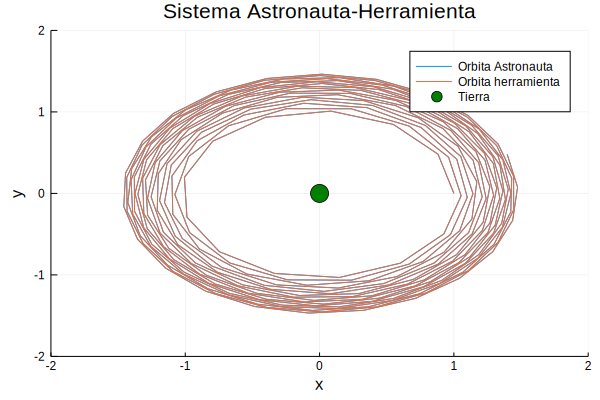

In [37]:
tiempo=collect(0:0.5:50*π)

xA,yA,vxA,vyA = rA, 0.0, 0.0, 1/sqrt(rA)
xH,yH,vxH,vyH = rH, 0.0, 0.0, 1/sqrt(rH)
cond_inic = [xA,yA,vxA,vyA,xH,yH,vxH,vyH]
solucion=RK_4(sistema_AH,cond_inic,tiempo,100,100)

#solucion=[xA,yA,vxA,vyA,xH,yH,vxH,vyH]

plot(title="Sistema Astronauta-Herramienta",xlabel="x",ylabel="y")
plot!(solucion[:,1],solucion[:,2], label="Orbita Astronauta",lw=1.0)
plot!(solucion[:,5],solucion[:,6], label="Orbita herramienta",lw=1.0)
scatter!([0],[0],markershape=:circle,markersize=10,markercolor=:green,label="Tierra",xlim=(-2,2),ylim=(-2,2))

Para obtener la convergencia de la solución utilizaremos el método de Runge-Kutta de segundo orden, y anexaremos una función que obtener la diferencia máxima entre soluciones usandos los dos diferentes métodos.

In [21]:
function RK_2(edo,x_ini,t,axH,ayH)
    sol = zeros( length(t) , length(x_ini) )
    sol[1,:] .= x_ini
    δ = t[2]-t[1]
    for i in 1:length(t)-1
        k1 = sol[i,:] .+ 0.5*δ .*edo(sol[i,:],t[i],axH,ayH)
        sol[i+1,:] .= sol[i,:] .+ δ*edo(k1,t[i]+0.5*δ,axH,ayH)
    end
    return sol
end

RK_2 (generic function with 1 method)

In [22]:
#Pedimos dos soluciones
function variacion(sol1,sol2)
    #Guardamos la información de las posiciones de la herramienta y la astronauta para la primera solución.
    x1A=sol1[:,1]
    y1A=sol1[:,2]
    x1H=sol1[:,5]
    y1H=sol1[:,5]
    #Guardamos la información de las posiciones de la herramienta y la astronauta para la segunda solución.
    x2A=sol2[:,1]
    y2A=sol2[:,2]
    x2H=sol2[:,5]
    y2H=sol2[:,5]
    #Definimos los arreglos donde anexaremos la diferencia en soluciones a cada tiempo
    xA=[]
    yA=[]
    xH=[]
    yH=[]
    #Hacemos un ciclo donde iremos anexando las diferencias de cada solución
    for i in 1:length(sol1[:,1])
        push!(xA,abs(x1A[i]-x2A[i]))
        push!(yA,abs(y2A[i]-y1A[i]))
        push!(xH,abs(x1H[i]-x2H[i]))
        push!(yH,abs(y1H[i]-y2H[i]))
    end
    #Definimos el arreglo donde anexamos el máximo de cada una de las diferencias en las soluciones 
    dif=[maximum(xA),maximum(yA),maximum(xH),maximum(yH)]
    #Obtenemos la diferencia máxima
    max=maximum(dif)
    return max
end

variacion (generic function with 1 method)

Definimos una función a la cual le entreguemos la distancia del astronauta desde la superficie terreste y nos devuelva el radio del astronauta respecto al centro de la tierra y de la herramienta respecto al centor de la Tierra normalizado.

In [23]:
function distancias(r_A)
    G=6.674e-11 #Constante gravitacional
    mT=5.972e24 #Masa de la Tierra
    r_H=r_A+0.00065 #El radio de la herramienta inicialmente es el radio de la astronauta más la distancia de su brazo
    #Definimos la proporcion de la posicion del astronauta respecto al radio de la Tierra
    rA_proporcion=(r_A+6371)/6371
    rH_proporcion=(r_H+6371)/6371
    
    rA_sf=1.0549364307016167*6371  #sf significa sin factor
    rH_sf=1.0549365327264166*6371
    #Multiplicamos por 1/τ
    rA_cf=rA_sf/(sqrt(G*mT)) #cf significa que ya fueron multiplicados por el factor: con factor
    rH_cf=rH_sf/(sqrt(G*mT))
    #Lo normalizamos
    normalizacion=1/rA_cf
    rA=rA_cf*normalizacion
    rH=rH_cf*normalizacion
    return rA,rH
end

distancias (generic function with 1 method)

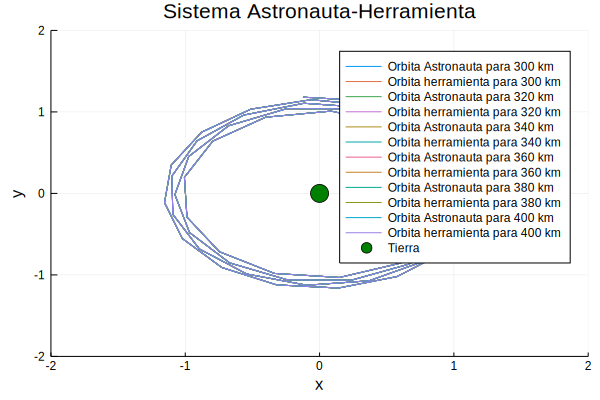

In [26]:
tiempo=collect(0:0.5:10*π)
plot(title="Sistema Astronauta-Herramienta",xlabel="x",ylabel="y")
for i in 300:20:400
    sol=distancias(i)
    xA,yA,vxA,vyA = sol[1], 0.0, 0.0, 1/sqrt(sol[1])
    xH,yH,vxH,vyH = sol[2], 0.0, 0.0, 1/sqrt(sol[2])
    cond_inic = [xA,yA,vxA,vyA,xH,yH,vxH,vyH]
    solucion=RK_4(sistema_AH,cond_inic,tiempo,100,100)

    plot!(solucion[:,1],solucion[:,2], label="Orbita Astronauta para $i km",lw=1.0)
    plot!(solucion[:,5],solucion[:,6], label="Orbita herramienta para $i km",lw=1.0)
end
scatter!([0],[0],markershape=:circle,markersize=10,markercolor=:green,label="Tierra",xlim=(-2,2),ylim=(-2,2))

Ahora programamos nuevamente el sistema Tierra-herramienta-astronauta pero agregamos a aceleración de la herramienta en x, y como una variable: Para raaficar diferentes orbitas dependiendo de la aceleración inicial de la herramienta.